# VSIP
### Length of Stay
#### By: Swapnil Malik - 015016

Problem Statement:
Projecting future demand requires estimates of how long patients with COVID-19 need different levels of hospital care.
While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

<a id='#2'></a>
<font color="darkslateblue" size=+2><b> Loading and Exploring Data</b></font>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
import textwrap

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chisquare, chi2_contingency, chi2


In [ ]:
df = pd.read_csv('host_train.csv')

In [ ]:
df.head() 

case_id  Hospital  Hospital_type  ...    Age  Admission_Deposit  Stay_Days
0        1         8              2  ...  51-60             4911.0       0-10
1        2         2              2  ...  51-60             5954.0      41-50
2        3        10              4  ...  51-60             4745.0      31-40
3        4        26              1  ...  51-60             7272.0      41-50
4        5        26              1  ...  51-60             5558.0      41-50

[5 rows x 18 columns]

In [ ]:
df.columns.values

array(['case_id', 'Hospital', 'Hospital_type', 'Hospital_city',
       'Hospital_region', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Illness_Severity', 'Patient_Visitors', 'Age', 'Admission_Deposit',
       'Stay_Days'], dtype=object)

In [ ]:
df.nunique()

case_id                              318438
Hospital                                 32
Hospital_type                             7
Hospital_city                            11
Hospital_region                           3
Available_Extra_Rooms_in_Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility                             6
Bed_Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Illness_Severity                          3
Patient_Visitors                         28
Age                                      10
Admission_Deposit                      7300
Stay_Days                                11
dtype: int64

### Column information.

* case_id: Case_ID registered in Hospita
* Hospital: Unique code for the Hospital
* Hospital_type: The hospitals types include clinics,emergency & Other Outpatient Care Centers etc which are numbered 1-7
* Hospital_city: The city in which hospital lies
* Hospital_region:Region Code of the Hospital
* Available_Extra_Rooms_in_Hospital: Extra rooms available in the hospital
* Department: Department overlooking the case { Radiology, 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery'}
* Ward_Type: Code for the Ward type{'R' 'S' 'Q' 'P' 'T' 'U'} 
* Ward_Facility:Code for the Ward Facility {'F' 'E' 'D' 'B' 'A' 'C'}
* Bed_Grade: Condition of Bed in the Ward
* patientid: Unique Patient Id
* City_Code_Patient : City Code for the patient                       
* Type of Admission Admission Type registered by the Hospital | {'Emergency' 'Trauma' 'Urgent'}                       
* Illness_Severity: term used to characterize the impact that a disease {'Extreme' 'Moderate' 'Minor'}                  
* Patient_Visitors: No. of visitors visiting the patient in due course of treatment                        
* Age : Age category of patient {'51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10' '91-100'}               
* Admission_Deposit : Deposit paid to the hospital at the time of admission                   
* Stay_Days: Number of days for which the patient was under the treatment in hospital. {'0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80' 'More than 100 Days' '81-90' '61-70' '91-100'}
    

In [ ]:
df.describe()

case_id       Hospital  ...  Patient_Visitors  Admission_Deposit
count  318438.000000  318438.000000  ...     318438.000000      318438.000000
mean   159219.500000      18.318841  ...          3.284099        4880.749392
std     91925.276847       8.633755  ...          1.764061        1086.776254
min         1.000000       1.000000  ...          0.000000        1800.000000
25%     79610.250000      11.000000  ...          2.000000        4186.000000
50%    159219.500000      19.000000  ...          3.000000        4741.000000
75%    238828.750000      26.000000  ...          4.000000        5409.000000
max    318438.000000      32.000000  ...         32.000000       11008.000000

[8 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
df.shape

(318438, 18)

In [ ]:
df.nunique()

case_id                              318438
Hospital                                 32
Hospital_type                             7
Hospital_city                            11
Hospital_region                           3
Available_Extra_Rooms_in_Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility                             6
Bed_Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Illness_Severity                          3
Patient_Visitors                         28
Age                                      10
Admission_Deposit                      7300
Stay_Days                                11
dtype: int64

In [ ]:
df.describe(include='all')

case_id       Hospital  ...  Admission_Deposit  Stay_Days
count   318438.000000  318438.000000  ...      318438.000000     318438
unique            NaN            NaN  ...                NaN         11
top               NaN            NaN  ...                NaN      21-30
freq              NaN            NaN  ...                NaN      87491
mean    159219.500000      18.318841  ...        4880.749392        NaN
std      91925.276847       8.633755  ...        1086.776254        NaN
min          1.000000       1.000000  ...        1800.000000        NaN
25%      79610.250000      11.000000  ...        4186.000000        NaN
50%     159219.500000      19.000000  ...        4741.000000        NaN
75%     238828.750000      26.000000  ...        5409.000000        NaN
max     318438.000000      32.000000  ...       11008.000000        NaN

[11 rows x 18 columns]

* Continuous Columns 'case_id','Extra_Rooms','patientid','City_Code_Patient','Visitors','Admission_Deposit' have a large difference between 75th quartile and maximum values which depicts presence of outliers in the columns.
* Object or discrete columns have many repeated values of unique labels which have to be numerically encoded.
* Since the target variable has 11 unique values(classes) therefore this dataset is an classification dataset.

<a id='#2'></a>
<font color="darkslateblue" size=+2><b> Handling Missing Values</b></font>

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

Bed Grade and City_Code_Patient features have null values to be filled.

In [ ]:
df['Bed_Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed_Grade, dtype: int64

In [ ]:
df['Bed_Grade'].fillna(2.0,inplace=True)

In [ ]:
df['Stay_Days'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
df['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [ ]:
df['City_Code_Patient'].fillna(8.0,inplace=True)

In [ ]:
df.isnull().sum()

case_id                              0
Hospital                             0
Hospital_type                        0
Hospital_city                        0
Hospital_region                      0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility                        0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Illness_Severity                     0
Patient_Visitors                     0
Age                                  0
Admission_Deposit                    0
Stay_Days                            0
dtype: int64

In [ ]:
df.Stay_Days.nunique()

11

In [ ]:
df.Age.nunique()

10

In [ ]:
df[df["Age"]=='51-60']

case_id  Hospital  Hospital_type  ...    Age  Admission_Deposit  Stay_Days
0             1         8              2  ...  51-60             4911.0       0-10
1             2         2              2  ...  51-60             5954.0      41-50
2             3        10              4  ...  51-60             4745.0      31-40
3             4        26              1  ...  51-60             7272.0      41-50
4             5        26              1  ...  51-60             5558.0      41-50
...         ...       ...            ...  ...    ...                ...        ...
318405   318406        28              1  ...  51-60             3632.0      51-60
318416   318417        12              0  ...  51-60             7202.0      11-20
318424   318425         6              0  ...  51-60             4455.0      11-20
318427   318428        20              1  ...  51-60             4271.0      31-40
318429   318430         3              2  ...  51-60             3559.0       0-10

[48514 rows x 18 columns]

In [ ]:
df = df[df.Age != "Nov-20"]

In [ ]:
df = df[df.Stay_Days != "Nov-20"]

In [ ]:
df.drop(df[df['Age']=="Nov-20"].index)

case_id  Hospital  Hospital_type  ...    Age  Admission_Deposit  Stay_Days
0             1         8              2  ...  51-60             4911.0       0-10
1             2         2              2  ...  51-60             5954.0      41-50
2             3        10              4  ...  51-60             4745.0      31-40
3             4        26              1  ...  51-60             7272.0      41-50
4             5        26              1  ...  51-60             5558.0      41-50
...         ...       ...            ...  ...    ...                ...        ...
318433   318434         6              0  ...  41-50             4144.0      11-20
318434   318435        24              0  ...  81-90             6699.0      31-40
318435   318436         7              0  ...  71-80             4235.0      11-20
318436   318437        11              1  ...  11-20             3761.0      11-20
318437   318438        19              0  ...  11-20             4752.0       0-10

[318438 rows x 18 columns]

In [ ]:
df.drop(df[df['Stay_Days']=="Nov-20"].index)

case_id  Hospital  Hospital_type  ...    Age  Admission_Deposit  Stay_Days
0             1         8              2  ...  51-60             4911.0       0-10
1             2         2              2  ...  51-60             5954.0      41-50
2             3        10              4  ...  51-60             4745.0      31-40
3             4        26              1  ...  51-60             7272.0      41-50
4             5        26              1  ...  51-60             5558.0      41-50
...         ...       ...            ...  ...    ...                ...        ...
318433   318434         6              0  ...  41-50             4144.0      11-20
318434   318435        24              0  ...  81-90             6699.0      31-40
318435   318436         7              0  ...  71-80             4235.0      11-20
318436   318437        11              1  ...  11-20             3761.0      11-20
318437   318438        19              0  ...  11-20             4752.0       0-10

[318438 rows x 18 columns]

In [ ]:
df.head()

case_id  Hospital  Hospital_type  ...    Age  Admission_Deposit  Stay_Days
0        1         8              2  ...  51-60             4911.0       0-10
1        2         2              2  ...  51-60             5954.0      41-50
2        3        10              4  ...  51-60             4745.0      31-40
3        4        26              1  ...  51-60             7272.0      41-50
4        5        26              1  ...  51-60             5558.0      41-50

[5 rows x 18 columns]

In [ ]:
df['Stay_Days'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

# Chi-Square testing

In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Hospital_type
contingencyTable = pd.crosstab(df['Stay_Days'],df['Hospital_type'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Hospital_type           0      1      2     3     4     5     6
Stay_Days                                                      
0-10                10559   5145   3588  1314  1805  1023   170
11-20               39807  13933  10318  4423  6644  2332   682
21-30               40286  19541  12526  5527  6524  1897  1190
31-40               23974  12385   8222  3706  4060  2093   719
41-50                4111   3893   1872   760   764   204   139
51-60               14617   6909   5176  2713  2832  1960   811
61-70                 924    917    430   186   197    44    46
71-80                3722   2608   1611   761   824   482   246
81-90                1890   1026    725   421   395   254   127
91-100                962    783    439   180   218   138    45
More than 100 Days   2573   1806   1021   398   507   276   102


(5540.640445301696,
 0.0,
 60,
 array([[1.06312805e+04, 5.11057532e+03, 3.40438174e+03, 1.51132075e+03,
         1.83605939e+03, 7.93352590e+02, 3.17029714e+02],
        [3.51939344e+04, 1.69181175e+04, 1.12699112e+04, 5.00309659e+03,
         6.07811577e+03, 2.62632512e+03, 1.04949944e+03],
        [3.94060906e+04, 1.89429480e+04, 1.26187410e+04, 5.60188796e+03,
         6.80556991e+03, 2.94065461e+03, 1.17510789e+03],
        [2.48437045e+04, 1.19426463e+04, 7.95552840e+03, 3.53172941e+03,
         4.29059481e+03, 1.85394575e+03, 7.40850787e+02],
        [5.28906655e+03, 2.54251339e+03, 1.69368136e+03, 7.51882712e+02,
         9.13440324e+02, 3.94693250e+02, 1.57722417e+02],
        [1.57721649e+04, 7.58185590e+03, 5.05061175e+03, 2.24213819e+03,
         2.72390814e+03, 1.17698784e+03, 4.70333271e+02],
        [1.23590212e+03, 5.94111959e+02, 3.95764425e+02, 1.75693278e+02,
         2.13444627e+02, 9.22284150e+01, 3.68551743e+01],
        [4.61841850e+03, 2.22012537e+03, 1.47892435e

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Hospital
contingencyTable = pd.crosstab(df['Stay_Days'],df['Hospital'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Hospital              1    2     3    4     5   ...    28    29    30    31    32
Stay_Days                                       ...                              
0-10                 369  274   795  200   332  ...  1226   565   352   459  1023
11-20               1062  970  1964  406  1423  ...  4089  2289   838   968  2332
21-30               1335  972  1993  370  1558  ...  4442  2834  1688  1093  1897
31-40                937  955  1117  137   929  ...  3083  2198  1085   632  2093
41-50                215  153   228   31   151  ...   542   437   328   184   204
51-60                716  943   574   63   549  ...  2170  1669   384   379  1960
61-70                 58   53    56   10    33  ...   121   124    55    41    44
71-80                239  312   138    8   124  ...   641   531   132   102   482
81-90                154  181    79    5    68  ...   254   218    36    28   254
91-100                49   73    53    4    30  ...   210   175    41    26   138
More than 100 Da

(18004.161645741166,
 0.0,
 310,
 array([[ 389.07855218,  378.18227724,  527.46865638,   91.91415597,
          389.96804401, 1513.98922239,   96.80636105,  271.51738172,
          853.17091553,  699.36295291, 1284.42620542,  837.38243551,
          388.11493603, 1284.42620542,  686.16882407,  272.11037627,
          407.75788065,  269.07127918, 1572.84393194,  104.14466866,
          604.11320257,  317.02971379, 1969.18666742,  592.40156012,
          728.93855633, 2451.73598628, 1055.82680459, 1270.26846042,
          838.42017598,  370.76984531,  294.0511748 ,  793.35258983],
        [1288.01088752, 1251.93971197, 1746.13935523,  304.27386179,
         1290.95547328, 5011.93034437,  320.46908346,  898.83480301,
         2824.3485074 , 2315.1805532 , 4251.98183634, 2772.08211018,
         1284.82091961, 4251.98183634, 2271.5025311 ,  900.79786018,
         1349.84718846,  890.73719217, 5206.76376877,  344.76191598,
         1999.86449482, 1049.49944102, 6518.82210666, 1961.09411565,


In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Hospital_city
contingencyTable = pd.crosstab(df['Stay_Days'],df['Hospital_city'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Hospital_city          1      2     3     4   ...    9     10    11    13
Stay_Days                                     ...                        
0-10                 3486   3919  2599   967  ...  2058   369  1226   180
11-20               15081   9844  7042  3165  ...  6211  1062  4089   601
21-30               16357  15099  8746  3530  ...  6157  1335  4442  1137
31-40                9215   9302  5610  2503  ...  4743   937  3083   741
41-50                1704   3351  1327   498  ...   659   215   542   216
51-60                5608   4739  3457  1805  ...  3924   716  2170   419
61-70                 411    796   283   139  ...   159    58   121    33
71-80                1511   1967  1066   557  ...   997   239   641   145
81-90                 735    772   448   228  ...   562   154   254    52
91-100                386    573   315   181  ...   248    49   210    42
More than 100 Days    857   1447   676   284  ...   559   115   359    64

[11 rows x 11 columns]


(8477.54480613693,
 0.0,
 100,
 array([[ 4102.85519944,  3840.30686036,  2340.03063705,  1027.14069301,
          2305.63695288,  3483.17588981,  2628.67073653,  1947.76473913,
           389.07855218,  1270.26846042,   269.07127918],
        [13582.14719663, 12713.00363336,  7746.46898611,  3400.26040548,
          7632.61167009, 11530.75245103,  8701.98706499,  6447.90666629,
          1288.01088752,  4205.11384634,   890.73719217],
        [15207.71497434, 14234.54870022,  8673.59856236,  3807.21769073,
          8546.11432995, 12910.80078697,  9743.47701279,  7219.61891169,
          1442.16537913,  4708.39933362,   997.3443182 ],
        [ 9587.75588655,  8974.21988268,  5468.29986057,  2400.27340644,
          5387.9269905 ,  8139.65848611,  6142.80838656,  4551.63342001,
           909.21809269,  2968.4264535 ,   628.7791344 ],
        [ 2041.17219993,  1910.55429   ,  1164.1662333 ,   511.00292993,
          1147.05536086,  1732.88148085,  1307.76480508,   969.0137829 ,
       

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Hospital_region
contingencyTable = pd.crosstab(df['Stay_Days'],df['Hospital_region'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Hospital_region         0      1      2
Stay_Days                              
0-10                 8145  10447   5012
11-20               33885  29786  14468
21-30               38768  31595  17128
31-40               22830  21314  11015
41-50                4405   5036   2302
51-60               14723  13023   7272
61-70                1012   1184    548
71-80                4091   4069   2094
81-90                1910   1940    988
91-100               1147   1068    550
More than 100 Days   2420   2966   1297


(1216.5939805661988,
 2.1072422385422048e-245,
 20,
 array([[ 9883.44024268,  9074.89216739,  4645.66758992],
        [32718.27389947, 30041.64544433, 15379.0806562 ],
        [36634.13278566, 33637.15432203, 17219.71289231],
        [23096.1142326 , 21206.65891634, 10856.22685107],
        [ 4917.01570792,  4514.76269792,  2311.22159416],
        [14662.69744189, 13463.16615479,  6892.13640332],
        [ 1148.96458337,  1054.96967071,   540.06574592],
        [ 4293.54330827,  3942.29555518,  2018.16113655],
        [ 2025.76190028,  1860.0376337 ,   952.20046602],
        [ 1157.75767967,  1063.04341819,   544.19890214],
        [ 2798.29821818,  2569.37401943,  1315.32776239]]))

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Department
contingencyTable = pd.crosstab(df['Stay_Days'],df['Department'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Department          TB & Chest disease  anesthesia  ...  radiotherapy  surgery
Stay_Days                                           ...                       
0-10                               791        1519  ...          2379       66
11-20                             2379        8823  ...          6988      259
21-30                             2618        8950  ...          7263      277
31-40                             1753        4958  ...          4713      200
41-50                              300         851  ...           879       42
51-60                             1047        2527  ...          3256      199
61-70                               76         173  ...           264        5
71-80                              294         703  ...          1043       49
81-90                              140         384  ...           528       38
91-100                              64         156  ...           256       20
More than 100 Days                 124         605  

(1618.9225961803502,
 0.0,
 40,
 array([[7.10555725e+02, 2.19771194e+03, 1.84929799e+04, 2.11372909e+03,
         8.90233075e+01],
        [2.35223326e+03, 7.27533526e+03, 6.12194102e+04, 6.99731729e+03,
         2.94703958e+02],
        [2.63375830e+03, 8.14607760e+03, 6.85464035e+04, 7.83478528e+03,
         3.29975352e+02],
        [1.66046192e+03, 5.13572247e+03, 4.32153144e+04, 4.93946716e+03,
         2.08034088e+02],
        [3.53501774e+02, 1.09336262e+03, 9.20026535e+03, 1.05158112e+03,
         4.42891332e+01],
        [1.05415355e+03, 3.26044216e+03, 2.74354843e+04, 3.13584838e+03,
         1.32071606e+02],
        [8.26031567e+01, 2.55487272e+02, 2.14983634e+03, 2.45724141e+02,
         1.03490915e+01],
        [3.08678123e+02, 9.54725397e+02, 8.03368142e+03, 9.18241743e+02,
         3.86733179e+01],
        [1.45639239e+02, 4.50454600e+02, 3.79041844e+03, 4.33241033e+02,
         1.82466854e+01],
        [8.32353237e+01, 2.57442532e+02, 2.16628917e+03, 2.47604683e+02,
    

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Ward_Type
contingencyTable = pd.crosstab(df['Stay_Days'],df['Ward_Type'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Ward_Type              P      Q      R      S    T  U
Stay_Days                                            
0-10                 461   8315   9310   5407  110  1
11-20               1393  29204  31621  15649  269  3
21-30               1802  34736  36698  13862  390  3
31-40                745  17177  22047  14897  291  2
41-50                285   4946   4269   2174   69  0
51-60                186   6507  13733  14402  190  0
61-70                 73    986   1045    627   13  0
71-80                 53   1953   4006   4186   56  0
81-90                 14    792   1692   2301   39  0
91-100                16    461   1118   1150   20  0
More than 100 Days    18   1088   2408   3139   30  0


(18451.43294170703,
 0.0,
 50,
 array([[3.74031315e+02, 7.86940836e+03, 9.48398429e+03, 5.76642730e+03,
         1.09481620e+02, 6.67118874e-01],
        [1.23819831e+03, 2.60509956e+04, 3.13959095e+04, 1.90892587e+04,
         3.62429431e+02, 2.20843932e+00],
        [1.38639103e+03, 2.91688869e+04, 3.51535023e+04, 2.13739405e+04,
         4.05806490e+02, 2.47275451e+00],
        [8.74054962e+02, 1.83896245e+04, 2.21626457e+04, 1.34752738e+04,
         2.55842089e+02, 1.55895653e+00],
        [1.86080738e+02, 3.91503399e+03, 4.71828620e+03, 2.86880002e+03,
         5.44671522e+01, 3.31891922e-01],
        [5.54898687e+02, 1.16747561e+04, 1.40700797e+04, 8.55485304e+03,
         1.62422782e+02, 9.89712283e-01],
        [4.34816950e+01, 9.14830391e+02, 1.10252724e+03, 6.70355724e+02,
         1.27274006e+01, 7.75535583e-02],
        [1.62485897e+02, 3.41861182e+03, 4.12001249e+03, 2.50503921e+03,
         4.75607748e+01, 2.89808377e-01],
        [7.66634258e+01, 1.61295533e+03, 1.943887

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Ward_Facility
contingencyTable = pd.crosstab(df['Stay_Days'],df['Ward_Facility'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Ward_Facility          A     B      C      D      E      F
Stay_Days                                                 
0-10                2382  2607   3921   3919   3486   7289
11-20               6135  7874  12068   9844  15081  27137
21-30               7476  8629   7867  15099  16357  32063
31-40               5003  6421   5591   9302   9215  19627
41-50               1198  1090    595   3351   1704   3805
51-60               3155  5059   3225   4739   5608  13232
61-70                255   250    138    796    411    894
71-80                967  1381    721   1967   1511   3707
81-90                408   768    400    772    735   1755
91-100               291   339    156    573    386   1020
More than 100 Days   636   738    781   1447    857   2224


(7507.470145092705,
 0.0,
 50,
 array([[ 2068.51325533,  2605.9145705 ,  2628.67073653,  3840.30686036,
          4102.85519944,  8357.73937784],
        [ 6847.63418311,  8626.65474598,  8701.98706499, 12713.00363336,
         13582.14719663, 27667.57317594],
        [ 7667.18747763,  9659.12860902,  9743.47701279, 14234.54870022,
         15207.71497434, 30978.943226  ],
        [ 4833.80455222,  6089.6306471 ,  6142.80838656,  8974.21988268,
          9587.75588655, 19530.7806449 ],
        [ 1029.08622087,  1296.44360284,  1307.76480508,  1910.55429   ,
          2041.17219993,  4157.97888129],
        [ 3068.76788574,  3866.03611378,  3899.79629944,  5697.33374158,
          6086.84050898, 12399.22545048],
        [  240.46773312,   302.94143287,   305.58687091,   446.44136692,
           476.96300065,   971.59959553],
        [  898.59917472,  1132.05592297,  1141.94160873,  1668.29802348,
          1782.35372035,  3630.75154975],
        [  423.97335745,   534.12195781,   538.78

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and Bed_Grade
contingencyTable = pd.crosstab(df['Stay_Days'],df['Bed_Grade'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Bed_Grade            1.0    2.0    3.0    4.0
Stay_Days                                    
0-10                2318   9295   7884   4107
11-20               5608  25569  31078  15884
21-30               7530  41652  25573  12736
31-40               4412  20145  20157  10445
41-50               1080   5122   3646   1895
51-60               3101  13710  11878   6329
61-70                275   1141    834    494
71-80               1006   3564   3637   2047
81-90                358   1241   2045   1194
91-100               278    926   1011    550
More than 100 Days   539   1419   2840   1885


(6784.786044038742,
 0.0,
 30,
 array([[ 1964.66508394,  9175.40474441,  8196.88960488,  4267.04056677],
        [ 6503.85379572, 30374.38363512, 27135.09391781, 14125.66865135],
        [ 7282.26202589, 34009.71600123, 30382.73463908, 15816.2873338 ],
        [ 4591.12698547, 21441.54170043, 19154.8989034 ,  9971.4324107 ],
        [  977.4217116 ,  4564.76774757,  4077.9560511 ,  2122.85448973],
        [ 2914.70267368, 13612.28280544, 12160.59482223,  6330.41969865],
        [  228.39522921,  1066.65440682,   952.90057091,   496.04979305],
        [  853.48567068,  3985.96001733,  3560.87552993,  1853.67878205],
        [  402.68808999,  1880.63922019,  1680.07761008,   874.59507973],
        [  230.14315189,  1074.8175783 ,   960.19317732,   499.84609249],
        [  556.25558193,  2597.83214315,  2320.78517325,  1208.12710167]]))

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between Stay_Days and City_Code_Patient
contingencyTable = pd.crosstab(df['Stay_Days'],df['City_Code_Patient'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

City_Code_Patient   1.0    2.0   3.0   4.0   5.0   ...  34.0  35.0  36.0  37.0  38.0
Stay_Days                                          ...                              
0-10                1859   2446   233  1432  1588  ...     2     5     2     4     2
11-20               6544  10193   751  3965  4583  ...    12     0     3    18     2
21-30               7720  11883   828  3986  4997  ...    14     5     2    14     0
31-40               4514   6376   703  2556  3608  ...     9     3     2     8     2
41-50                733   1130   175   669   816  ...     3     0     0     4     0
51-60               3064   4377   493  1639  2436  ...     4     2     3     5     0
61-70                172    199    61   126   230  ...     0     1     0     1     0
71-80                737    940   187   433   807  ...     1     0     0     1     0
81-90                386    523    93   215   335  ...     1     0     0     0     0
91-100               194    248    69   123   197  ...     0     

(4317.122623066142,
 0.0,
 360,
 array([[1.95517717e+03, 2.88113817e+03, 2.79596933e+02, 1.14003203e+03,
         1.48834221e+03, 4.45116538e+02, 1.76467767e+03, 9.52816238e+03,
         8.74296347e+02, 6.05892186e+02, 4.87738021e+01, 4.18580031e+02,
         1.20452019e+02, 2.16961883e+02, 6.63412658e+02, 1.67076216e+02,
         1.04070544e+02, 7.61998003e+01, 1.04441166e+02, 1.18747160e+02,
         3.00203493e+01, 2.74111733e+02, 2.66847550e+01, 5.91512068e+01,
         7.58291787e+01, 5.71498502e+01, 3.86187704e+01, 7.26418329e+00,
         9.85853447e+00, 4.37333484e+00, 3.85446461e+00, 5.78169691e+00,
         3.40971869e+00, 1.18598911e+00, 8.89491832e-01, 4.22508620e+00,
         4.44745916e-01],
        [6.47244488e+03, 9.53775866e+03, 9.25581457e+02, 3.77397741e+03,
         4.92702812e+03, 1.47351979e+03, 5.84181276e+03, 3.15421573e+04,
         2.89428242e+03, 2.00575367e+03, 1.61461452e+02, 1.38567298e+03,
         3.98745988e+02, 7.18233543e+02, 2.19617021e+03, 5.5309135

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between visibility and flight impact
contingencyTable = pd.crosstab(df['Stay_Days'],df['Type of Admission'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Type of Admission   Emergency  Trauma  Urgent
Stay_Days                                    
0-10                    14218    5328    4058
11-20                   31559   33745   12835
21-30                   27399   46244   13848
31-40                   18921   28107    8131
41-50                    4145    5968    1630
51-60                   11885   18310    4823
61-70                     976    1479     289
71-80                    3375    5551    1328
81-90                    1708    2548     582
91-100                    935    1518     312
More than 100 Days       2555    3463     665


(9632.544342702113,
 0.0,
 20,
 array([[ 8722.65340192, 11286.24298608,  3595.10361201],
        [28875.58948367, 37362.13102394, 11901.2794924 ],
        [32331.53994184, 41833.78601486, 13325.6740433 ],
        [20383.52986767, 26374.2533837 ,  8401.21674863],
        [ 4339.52376287,  5614.91066707,  1788.56557006],
        [12940.59806933, 16743.84243715,  5333.55949353],
        [ 1014.02139192,  1312.04248237,   417.93612571],
        [ 3789.27673205,  4902.94592354,  1561.77734441],
        [ 1787.84092351,  2313.28772948,   736.87134701],
        [ 1021.78175971,  1322.08362381,   421.13461647],
        [ 2469.64466552,  3195.47372801,  1017.88160647]]))

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between visibility and flight impact
contingencyTable = pd.crosstab(df['Stay_Days'],df['Illness_Severity'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Illness_Severity    Extreme  Minor  Moderate
Stay_Days                                   
0-10                   3399   7866     12339
11-20                 10518  27081     40540
21-30                 15502  21535     50454
31-40                 10086  14447     30626
41-50                  2351   3000      6392
51-60                  7777   7128     20113
61-70                   647    519      1578
71-80                  2575   1928      5751
81-90                  1113    985      2740
91-100                  805    425      1535
More than 100 Days     1950    958      3775


(6616.481596269036,
 0.0,
 20,
 array([[ 4204.55376557,  6365.20354983, 13034.2426846 ],
        [13918.81150177, 21071.4556931 , 43148.73280513],
        [15584.67266155, 23593.37501178, 48312.95232667],
        [ 9825.41014891, 14874.52391988, 30459.0659312 ],
        [ 2091.76727966,  3166.6914627 ,  6484.54125764],
        [ 6237.71664814,  9443.17479698, 19337.10855488],
        [  488.78560976,   739.96435099,  1515.25003925],
        [ 1826.5333974 ,  2765.15832909,  5662.30827351],
        [  861.78745627,  1304.64560134,  2671.56694239],
        [  492.52631595,   745.62734347,  1526.84634057],
        [ 1190.43521502,  1802.17994084,  3690.38484415]]))

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [ ]:
# Two-way Chisquare test for the relationship between visibility and flight impact
contingencyTable = pd.crosstab(df['Stay_Days'],df['Age'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

Age                 0-10  11-20  21-30  31-40  ...  61-70  71-80  81-90  91-100
Stay_Days                                      ...                             
0-10                 615   1552   3467   4916  ...   2194   2201    422      83
11-20               1959   5343  11272  15792  ...   7870   7958   1392     248
21-30               1489   4312  11394  18550  ...   9033   9534   1920     295
31-40               1014   2681   6912  10912  ...   5930   6420   1504     234
41-50                187    510   1398   2373  ...   1205   1383    379      66
51-60                582   1429   3793   6517  ...   4081   4433   1082     173
61-70                 26     89    263    509  ...    325    378    115      29
71-80                153    350   1026   1807  ...   1230   1367    402      63
81-90                 84    223    546    801  ...    600    670    216      29
91-100                35     71    231    484  ...    330    386    132      19
More than 100 Days   110    208    541  

(3652.8901912117676,
 0.0,
 90,
 array([[4.63573493e+02, 1.24291659e+03, 3.02745957e+03, 4.71719756e+03,
         4.72535123e+03, 3.59606723e+03, 2.49702595e+03, 2.65305764e+03,
         5.84840880e+02, 9.65098638e+01],
        [1.53461994e+03, 4.11456783e+03, 1.00221430e+04, 1.56158744e+04,
         1.56428665e+04, 1.19044695e+04, 8.26618837e+03, 8.78271779e+03,
         1.93606514e+03, 3.19487555e+02],
        [1.71828963e+03, 4.60701640e+03, 1.12216347e+04, 1.74848471e+04,
         1.75150697e+04, 1.33292458e+04, 9.25552012e+03, 9.83386993e+03,
         2.16778145e+03, 3.57725152e+02],
        [1.08330157e+03, 2.90450924e+03, 7.07471796e+03, 1.10233816e+04,
         1.10424355e+04, 8.40346857e+03, 5.83517430e+03, 6.19979691e+03,
         1.36668523e+03, 2.25529045e+02],
        [2.30628009e+02, 6.18351528e+02, 1.50616242e+03, 2.34680778e+03,
         2.35086424e+03, 1.78904497e+03, 1.24227147e+03, 1.31989730e+03,
         2.90958585e+02, 4.80136981e+01],
        [6.87740069e+02, 1.8

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


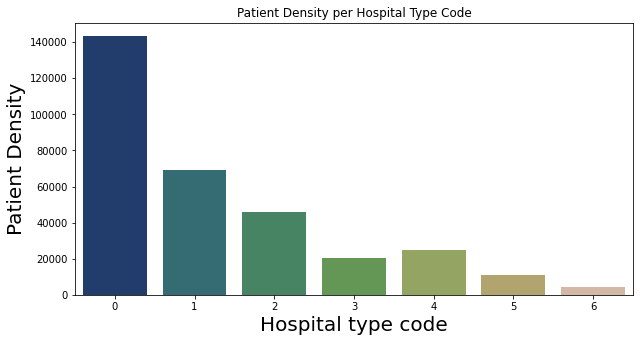

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Hospital_type', data = df, palette = 'gist_earth')
plt.xlabel('Hospital type code', size = 20)
plt.ylabel('Patient Density', size = 20)
plt.title('Patient Density per Hospital Type Code')
plt.show()

Hospital with type code'1' has highest number of patients thus, less beds/rooms left available. Hospital with type code'6' has lowest number of patients thus, more beds/rooms left available.

In [ ]:
def rel_cat(df,x_axis,y_axis,path,stacked=None):
    temp =pd.crosstab(df[x_axis],df[y_axis])
    temp.plot(kind='bar',stacked=stacked,grid=False)
    plt.xlabel(str(x_axis),weight='bold',fontsize=12)
    plt.ylabel(str(y_axis),weight='bold',fontsize=12)
    plt.title(str(x_axis)+'_'+'and'+'_'+str(y_axis),weight='bold',fontsize=14)
    plt.xticks(rotation=0,fontsize=12)
    plt.yticks(fontsize=12)
    labels = df[x_axis].value_counts().index.tolist()
    labels.sort()
    labels=[textwrap.fill(text,10) for text in labels]
    pos = np.arange(len(labels)) 
    plt.xticks(pos, labels)

In [ ]:
plt.figure(figsize = (7,5))
fig = px.histogram(df, x="Age").update_xaxes(categoryorder="total descending")
fig.show()

<Figure size 504x360 with 0 Axes>

Mostly patients admitted are between the age of 30-50. The other age group are been admitted comparatively less.

This shows that patient density is very close within 1 and 2region. in the 1 region the patients are better distributed between different hospital codes than regions 1 and 2. These indep variables are not valuable for our task. The aim of this project is to predict the LOS. Predicting LOS helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission and thus better allocate resources for the management of these patients.Thus, how patients are distributed betweeen different hospital type codes and region is not important here at all. What we care about is how to better manage patient at risk of high LOS in each hospital.

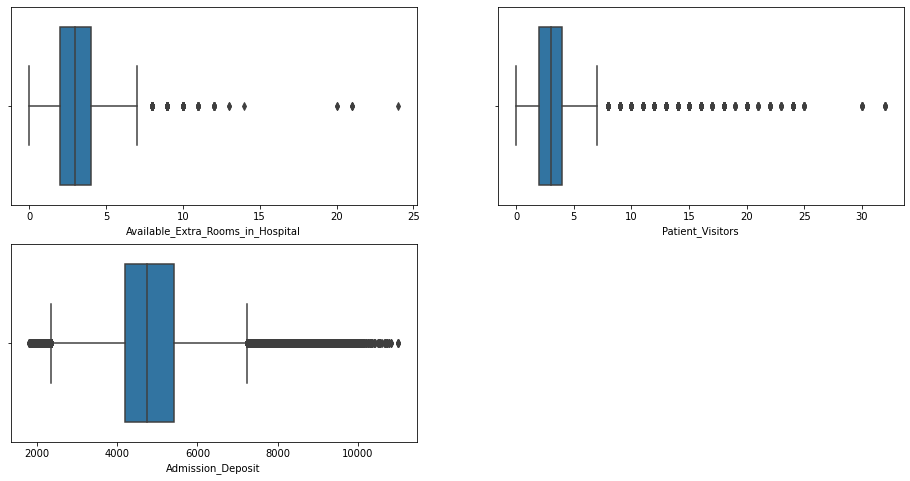

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,8))
sns.boxplot(ax = ax[0, 0], x = df['Available_Extra_Rooms_in_Hospital'])
sns.boxplot(ax = ax[0, 1], x = df['Patient_Visitors'])
sns.boxplot(ax = ax[1, 0], x = df['Admission_Deposit'])
fig.delaxes(ax[1,1])

plt.show()

<B> Stay Days Analysis </B>

<function matplotlib.pyplot.show>

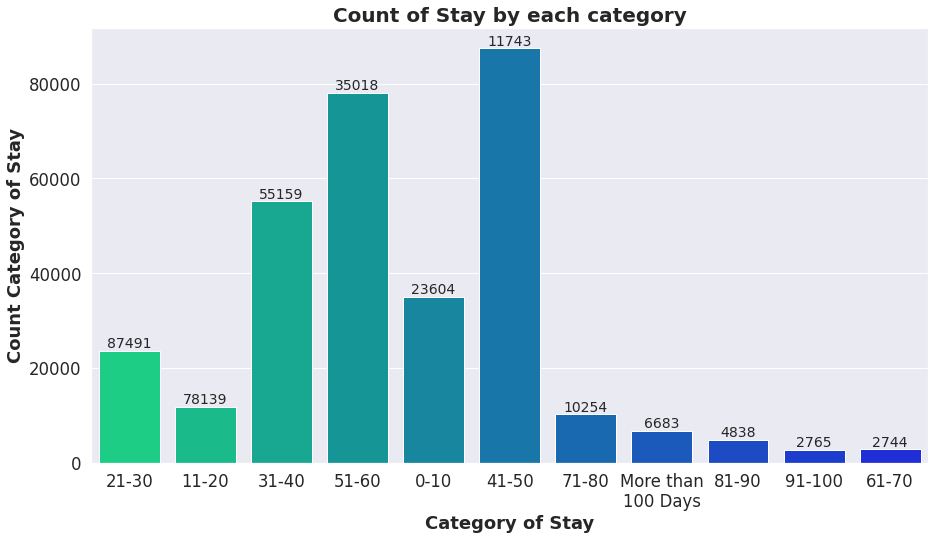

In [ ]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Stay_Days',data=df,palette='winter_r')
plt.xlabel("Category of Stay",weight='bold',fontsize=18)
plt.ylabel("Count Category of Stay",weight='bold',fontsize=18)
plt.title("Count of Stay by each category",weight='bold',fontsize=20)

#adding the text labels
rects = ax.patches
labels = df['Stay_Days'].value_counts().tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=14)

c_labels = df['Stay_Days'].value_counts().index.tolist()
c_name=[textwrap.fill(text,10) for text in c_labels]
pos = np.arange(len(c_name)) 
plt.xticks(pos, c_name)

plt.show

Most number of patients stay for less than 50 days.However as the number of days increases 50 a sharp decline of number of patients has been observed.

In [ ]:
fig = px.histogram(df, x="Stay_Days").update_xaxes(categoryorder="total descending")
fig.show()

Most patients stay for 21-30 days at hospital.Implying hospital resources being occupied for mostly 21-30 days.

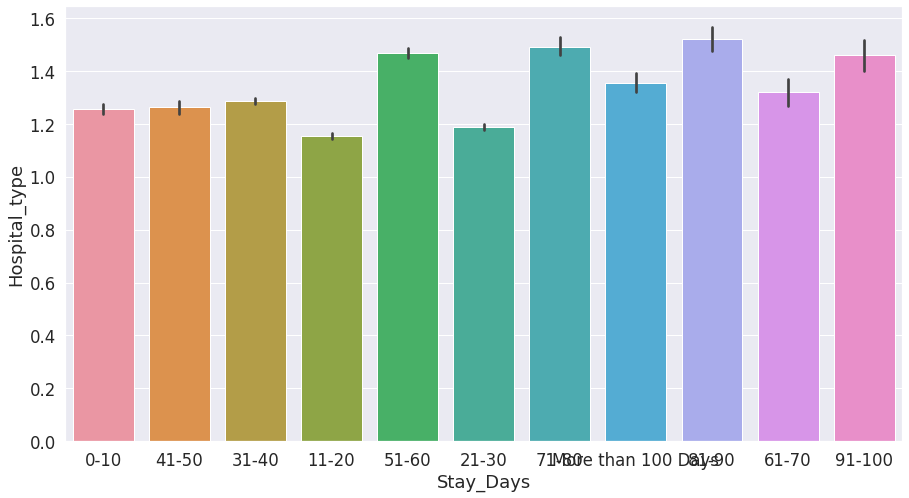

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x= "Stay_Days",y= "Hospital_type", data = df)

In [ ]:
order = ['0-10', '11-20', '21-30', '31-40', 
         '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']

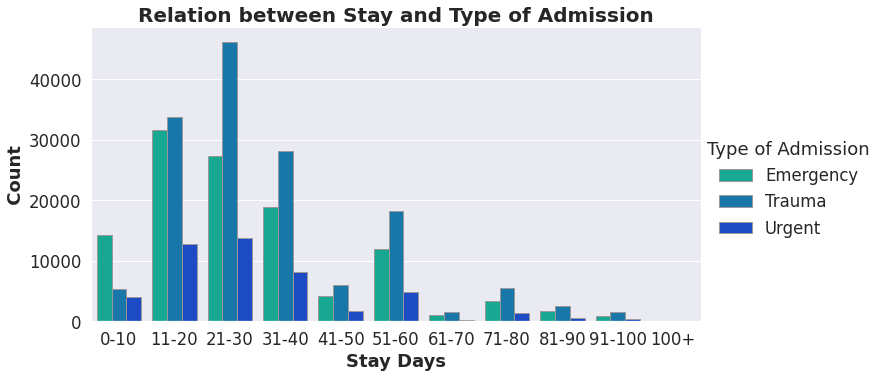

In [ ]:
sns.catplot(x='Stay_Days', hue="Type of Admission", kind="count",
            palette="winter_r", edgecolor=".6",
            data=df, height=5, aspect=2, order=order)
plt.xticks(rotation=0)
plt.xlabel("Stay Days",weight='bold',fontsize=18)
plt.ylabel(" Count ",weight='bold',fontsize=18)
plt.title("Relation between Stay and Type of Admission",weight='bold',fontsize=20)
plt.show()

<Figure size 720x432 with 0 Axes>

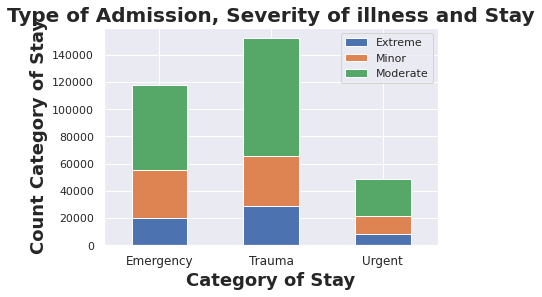

In [ ]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,6))
t1 = df.groupby(['Type of Admission','Illness_Severity'])[['Stay_Days']].count().add_prefix('count_of_').reset_index()
t2 = t1.pivot('Type of Admission','Illness_Severity','count_of_Stay_Days')
t2.plot(kind='bar',stacked=True)
plt.legend(loc='best')
plt.xticks(rotation=0,fontsize=12)
plt.xlabel("Category of Stay",weight='bold',fontsize=18)
plt.ylabel("Count Category of Stay",weight='bold',fontsize=18)
plt.title("Type of Admission, Severity of illness and Stay",weight='bold',fontsize=20)
plt.show()

Patients mainly suffer from moderate level of illness with admission type Trauma. Showing greater requirement of equipments related to 'moderate'Illness and admission type 'Trauma'.

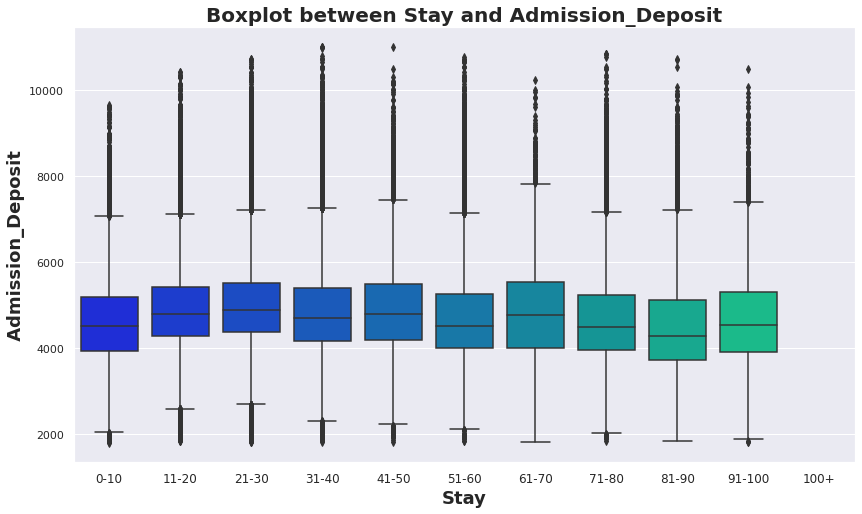

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Stay_Days',y='Admission_Deposit', order=order, data=df,palette='winter')
plt.xticks(fontsize=12)
plt.xlabel("Stay",weight='bold',fontsize=18)
plt.ylabel(" Admission_Deposit ",weight='bold',fontsize=18)
plt.title("Boxplot between Stay and Admission_Deposit",weight='bold',fontsize=20)
plt.show()

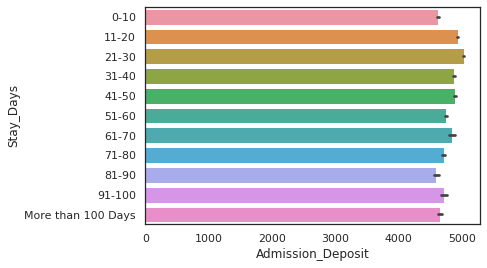

In [ ]:
sns.set(style="white")

g=sns.barplot(y="Stay_Days", x="Admission_Deposit", data=df,order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days'])

When the Admission Deposit tends to high values, patients are discharged early probably.

<a id='#2'></a>
<font color="darkslateblue" size=+2><b> Analysis of Categorical & Numerical Data </b></font>

In [ ]:
df['Stay_Days']= df['Stay_Days'].replace({'0-10': 0, '11-20': 0, '21-30': 0, '31-40': 1, '41-50': 1, '51-60': 1, '61-70': 2, '71-80': 2, '81-90': 2, '91-100': 3, 'More than 100 Days': 3})

In [ ]:
df['Stay_Days'].unique()

array([0, 1, 2, 3])

In [ ]:
categorical_data = [c for c in df.columns if df[c].dtypes=='object']
categorical_data

['Department',
 'Ward_Type',
 'Ward_Facility',
 'Type of Admission',
 'Illness_Severity',
 'Age']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

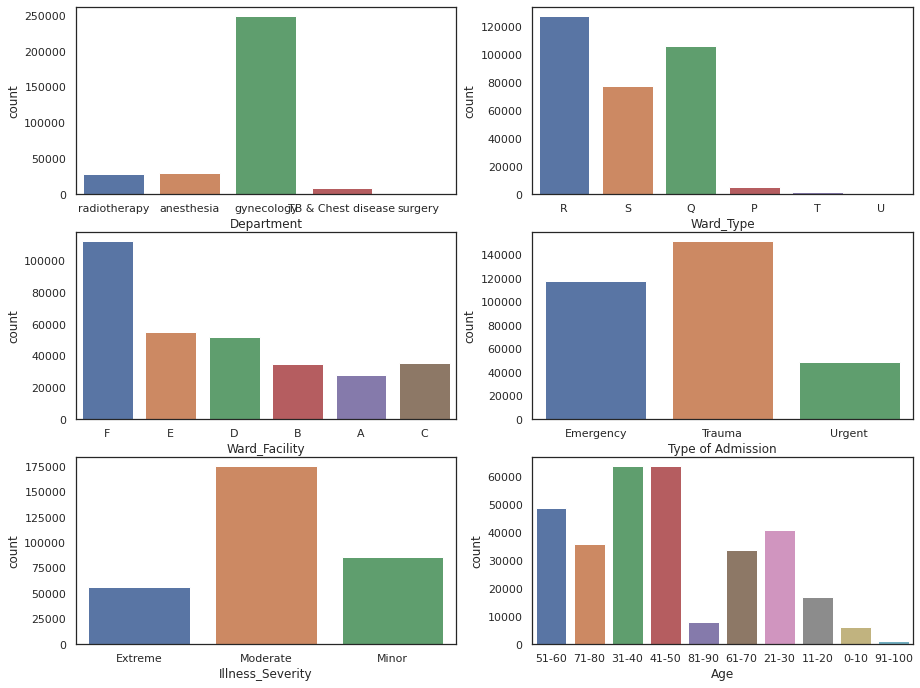

In [ ]:
i=1
plt.figure(figsize=(15,20))
for col in categorical_data:
    plt.subplot(5,2,i)
    sns.countplot(df[col])
    i=i+1
plt.show()

Number of patients admitted are significantly towards a particular sub category: 
* Department: Gynaecology
* Ward Type: R
* Ward Facility: F
* Type of admission: Trauma
* Illness severity: Moderate
* Age: 41-50
* Stay_Days: 41:50

In [ ]:
numerical_data = ['Patient_Visitors', 'Admission_Deposit', 'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'case_id' ]
numerical_data

['Patient_Visitors',
 'Admission_Deposit',
 'Available_Extra_Rooms_in_Hospital',
 'Bed_Grade',
 'case_id']

Based on histogram and skewness value, we can know who columns is nearly normally distributed or not. You can see on extra rooms, visitors with patient and admission deposite columns they have right skewed distributions (based on histograms above ), and based on the skewness value they are in moderately skewed/highly skewed.

In [ ]:
# Conversion categorical to numerical
categorical_data1 = [c for c in df.columns if c not in numerical_data]
categorical_data1

['Hospital',
 'Hospital_type',
 'Hospital_city',
 'Hospital_region',
 'Department',
 'Ward_Type',
 'Ward_Facility',
 'patientid',
 'City_Code_Patient',
 'Type of Admission',
 'Illness_Severity',
 'Age',
 'Stay_Days']

In [ ]:
for col in categorical_data:
    le = LabelEncoder() 
    df[col]  = le.fit_transform(df[col].astype(str)) 
    
le = LabelEncoder()
df.Stay_Days = le.fit_transform(df.Stay_Days.astype(str))
df.Department = le.fit_transform(df.Department.astype(str))
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


Text(0.5, 1.0, 'Correlation Matrix')

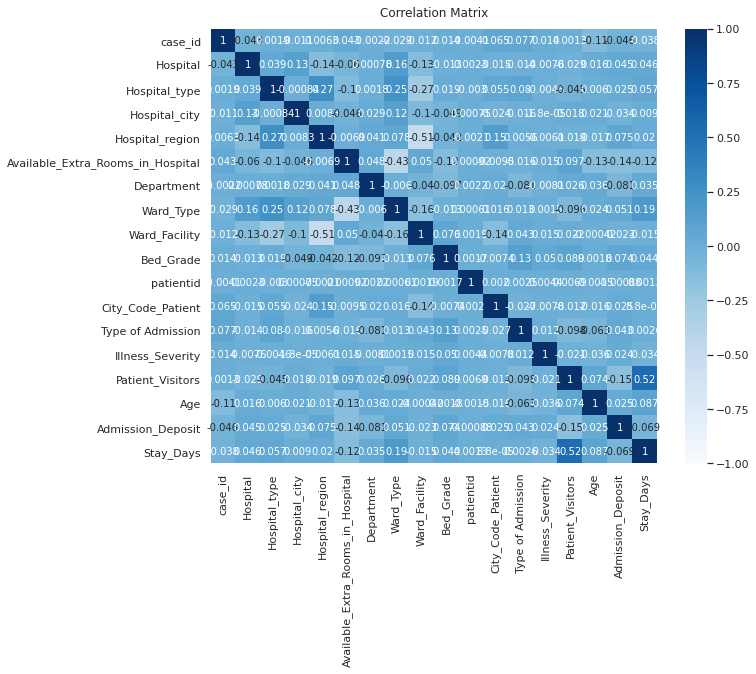

In [ ]:
plt.figure(figsize=(10,8))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12)

# Modelling


In [ ]:
df.drop(columns=['patientid','Hospital_city','Bed_Grade','City_Code_Patient'], inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

y= df['Stay_Days']
X= df.drop('Stay_Days', axis=1)


In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
X

case_id  Hospital  ...  Age  Admission_Deposit
0             1         8  ...    5             4911.0
1             2         2  ...    5             5954.0
2             3        10  ...    5             4745.0
3             4        26  ...    5             7272.0
4             5        26  ...    5             5558.0
...         ...       ...  ...  ...                ...
318433   318434         6  ...    4             4144.0
318434   318435        24  ...    8             6699.0
318435   318436         7  ...    7             4235.0
318436   318437        11  ...    1             3761.0
318437   318438        19  ...    1             4752.0

[318438 rows x 13 columns]

In [ ]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape

((254750, 13), (254750,), (63688, 13))

In [ ]:
#KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)
knn_accuracy

0.5311047607084537

In [ ]:
from sklearn import metrics

# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, knn_y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, knn_y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))) #RMSE

# rSquared
score = r2_score(y_test, knn_y_pred)
print("R^2:", score)

MAE:  0.5693066197713855
MSE:  0.8156952644140183
RMSE:  0.9031584935181745
R^2: -0.5115964734659877


In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_y_pred =decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, y_test)
decision_tree_accuracy

0.608324959175983

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, decision_tree_y_pred )) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, decision_tree_y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, decision_tree_y_pred))) #RMSE

# rSquared
score = r2_score(y_test, decision_tree_y_pred)
print("R^2:", score)

MAE:  0.4577000376837081
MSE:  0.6058912196960181
RMSE:  0.7783901461966346
R^2: -0.12280047580568887


In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_accuracy = random_forest.score(X_test, y_test)
random_forest_accuracy

0.7260708453711845

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, random_forest_y_pred )) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, random_forest_y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, random_forest_y_pred))) #RMSE

# rSquared
score = r2_score(y_test, random_forest_y_pred)
print("R^2:", score)

MAE:  0.3102311267428715
MSE:  0.39046602185655066
RMSE:  0.624872804542293
R^2: 0.27641229832238334


In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree','KNN','Random Forest'],
    'Score': [decision_tree_accuracy, knn_accuracy,  random_forest_accuracy,]})
models.sort_values(by='Score', ascending=False)

Model     Score
2  Random Forest  0.726071
0  Decision Tree  0.608325
1            KNN  0.531105